In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [2]:
env = gym.make("Taxi-v2")

In [3]:
q_table = np.zeros((env.observation_space.n, env.action_space.n))

Hypo-parameters

In [4]:
max_random_probability = 1.0
min_random_probability = 0
gamma = 0.99
# If we set alpha to 0.3, q learning performed worst than dqn
alpha = 0.3

In [5]:
reward_list = []
steps_list = []

episode_num = 1000
all_step_counter = 0
random_probability_distribution = np.linspace(max_random_probability, min_random_probability, episode_num * 0.8)


for i in range(episode_num):
    done = False
    episode_reward = 0
    current_state = env.reset()
    step_counter = 0
    random_probability = random_probability_distribution[i] if i < len(random_probability_distribution) else min_random_probability
    while step_counter < 100: # If agent cannot find the solution in 50 steps reset the environment
        
        # Choose an acton
        if np.random.uniform() <= random_probability:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[current_state, :])
        
        # Excute the action
        next_state, reward, done, info = env.step(action)
        
        # Learn
        if done == True:
            q_learned_value = reward
        else:
            q_learned_value = reward + gamma * np.amax(q_table[next_state, :])
            q_table[current_state, action] = (1 - alpha) * q_table[current_state, action]  + alpha * q_learned_value
        
        current_state = next_state
        
        episode_reward += reward
        
        step_counter += 1
        
        if i > episode_num - 5:
            env.render()
            
        if done == True:
            break
            
    reward_list.append(episode_reward)
    steps_list.append(step_counter)
    
    print("Episode: {0},  step: {1}, random: {2}".format(i, step_counter, random_probability))
    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


Episode: 0,  step: 100, random: 1.0
Episode: 1,  step: 100, random: 0.9987484355444305
Episode: 2,  step: 100, random: 0.9974968710888611
Episode: 3,  step: 100, random: 0.9962453066332916
Episode: 4,  step: 100, random: 0.9949937421777222
Episode: 5,  step: 100, random: 0.9937421777221527
Episode: 6,  step: 100, random: 0.9924906132665833
Episode: 7,  step: 100, random: 0.9912390488110138
Episode: 8,  step: 100, random: 0.9899874843554443
Episode: 9,  step: 100, random: 0.9887359198998749
Episode: 10,  step: 100, random: 0.9874843554443054
Episode: 11,  step: 100, random: 0.986232790988736
Episode: 12,  step: 100, random: 0.9849812265331664
Episode: 13,  step: 100, random: 0.983729662077597
Episode: 14,  step: 100, random: 0.9824780976220275
Episode: 15,  step: 100, random: 0.981226533166458
Episode: 16,  step: 100, random: 0.9799749687108886
Episode: 17,  step: 100, random: 0.9787234042553191
Episode: 18,  step: 100, random: 0.9774718397997497
Episode: 19,  step: 100, random: 0.97622

Episode: 178,  step: 100, random: 0.7772215269086358
Episode: 179,  step: 100, random: 0.7759699624530663
Episode: 180,  step: 90, random: 0.7747183979974969
Episode: 181,  step: 100, random: 0.7734668335419275
Episode: 182,  step: 100, random: 0.772215269086358
Episode: 183,  step: 100, random: 0.7709637046307884
Episode: 184,  step: 100, random: 0.769712140175219
Episode: 185,  step: 100, random: 0.7684605757196495
Episode: 186,  step: 100, random: 0.7672090112640801
Episode: 187,  step: 33, random: 0.7659574468085106
Episode: 188,  step: 100, random: 0.7647058823529411
Episode: 189,  step: 100, random: 0.7634543178973717
Episode: 190,  step: 100, random: 0.7622027534418022
Episode: 191,  step: 100, random: 0.7609511889862328
Episode: 192,  step: 100, random: 0.7596996245306633
Episode: 193,  step: 85, random: 0.7584480600750938
Episode: 194,  step: 100, random: 0.7571964956195244
Episode: 195,  step: 100, random: 0.755944931163955
Episode: 196,  step: 100, random: 0.7546933667083855

Episode: 334,  step: 100, random: 0.5819774718397998
Episode: 335,  step: 72, random: 0.5807259073842304
Episode: 336,  step: 100, random: 0.5794743429286608
Episode: 337,  step: 100, random: 0.5782227784730913
Episode: 338,  step: 100, random: 0.5769712140175218
Episode: 339,  step: 100, random: 0.5757196495619524
Episode: 340,  step: 73, random: 0.574468085106383
Episode: 341,  step: 100, random: 0.5732165206508135
Episode: 342,  step: 100, random: 0.571964956195244
Episode: 343,  step: 100, random: 0.5707133917396745
Episode: 344,  step: 100, random: 0.5694618272841051
Episode: 345,  step: 100, random: 0.5682102628285357
Episode: 346,  step: 100, random: 0.5669586983729662
Episode: 347,  step: 100, random: 0.5657071339173967
Episode: 348,  step: 100, random: 0.5644555694618273
Episode: 349,  step: 100, random: 0.5632040050062579
Episode: 350,  step: 100, random: 0.5619524405506884
Episode: 351,  step: 71, random: 0.5607008760951189
Episode: 352,  step: 100, random: 0.559449311639549

Episode: 494,  step: 50, random: 0.3817271589486858
Episode: 495,  step: 49, random: 0.3804755944931164
Episode: 496,  step: 40, random: 0.3792240300375469
Episode: 497,  step: 87, random: 0.3779724655819775
Episode: 498,  step: 67, random: 0.376720901126408
Episode: 499,  step: 100, random: 0.3754693366708385
Episode: 500,  step: 42, random: 0.3742177722152691
Episode: 501,  step: 81, random: 0.3729662077596996
Episode: 502,  step: 100, random: 0.3717146433041302
Episode: 503,  step: 82, random: 0.37046307884856067
Episode: 504,  step: 17, random: 0.36921151439299127
Episode: 505,  step: 100, random: 0.36795994993742176
Episode: 506,  step: 100, random: 0.36670838548185225
Episode: 507,  step: 53, random: 0.36545682102628285
Episode: 508,  step: 52, random: 0.36420525657071334
Episode: 509,  step: 100, random: 0.36295369211514394
Episode: 510,  step: 15, random: 0.36170212765957444
Episode: 511,  step: 77, random: 0.36045056320400504
Episode: 512,  step: 65, random: 0.3591989987484355

Episode: 660,  step: 63, random: 0.17396745932415514
Episode: 661,  step: 88, random: 0.17271589486858574
Episode: 662,  step: 10, random: 0.17146433041301623
Episode: 663,  step: 54, random: 0.17021276595744683
Episode: 664,  step: 25, random: 0.16896120150187732
Episode: 665,  step: 100, random: 0.1677096370463078
Episode: 666,  step: 100, random: 0.16645807259073842
Episode: 667,  step: 92, random: 0.1652065081351689
Episode: 668,  step: 60, random: 0.1639549436795995
Episode: 669,  step: 87, random: 0.16270337922403
Episode: 670,  step: 74, random: 0.1614518147684606
Episode: 671,  step: 21, random: 0.1602002503128911
Episode: 672,  step: 100, random: 0.15894868585732158
Episode: 673,  step: 31, random: 0.15769712140175218
Episode: 674,  step: 37, random: 0.15644555694618267
Episode: 675,  step: 37, random: 0.15519399249061328
Episode: 676,  step: 45, random: 0.15394242803504377
Episode: 677,  step: 14, random: 0.15269086357947437
Episode: 678,  step: 71, random: 0.1514392991239048

Episode: 839,  step: 36, random: 0
Episode: 840,  step: 52, random: 0
Episode: 841,  step: 9, random: 0
Episode: 842,  step: 21, random: 0
Episode: 843,  step: 100, random: 0
Episode: 844,  step: 87, random: 0
Episode: 845,  step: 75, random: 0
Episode: 846,  step: 15, random: 0
Episode: 847,  step: 19, random: 0
Episode: 848,  step: 8, random: 0
Episode: 849,  step: 31, random: 0
Episode: 850,  step: 17, random: 0
Episode: 851,  step: 10, random: 0
Episode: 852,  step: 44, random: 0
Episode: 853,  step: 24, random: 0
Episode: 854,  step: 12, random: 0
Episode: 855,  step: 34, random: 0
Episode: 856,  step: 15, random: 0
Episode: 857,  step: 35, random: 0
Episode: 858,  step: 29, random: 0
Episode: 859,  step: 9, random: 0
Episode: 860,  step: 15, random: 0
Episode: 861,  step: 9, random: 0
Episode: 862,  step: 18, random: 0
Episode: 863,  step: 12, random: 0
Episode: 864,  step: 37, random: 0
Episode: 865,  step: 38, random: 0
Episode: 866,  step: 10, random: 0
Episode: 867,  step: 45

  (West)
+---------+
|R: | : :G|
|_: : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Episode: 998,  step: 31, random: 0
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | 

In [6]:
q_table

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ -7.38107463,  -6.88463058,  -6.86050393,  -6.89673183,
         -6.78434743, -14.41736918],
       [ -5.32019189,  -5.39075625,  -5.7003607 ,  -5.09298752,
         -4.90098993, -13.95868381],
       ...,
       [ -4.21086712,  -3.92980274,  -4.18734325,  -4.25740269,
        -12.64314229, -11.21420513],
       [ -6.44485127,  -6.54737452,  -6.56173116,  -6.55827979,
        -12.74782166, -14.02329054],
       [ -1.57635606,  -1.60535717,  -1.85673277,  -0.99980842,
         -7.02283679,  -7.03828496]])

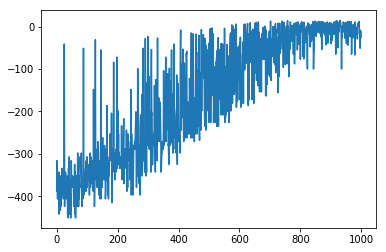

In [7]:
plt.plot(reward_list)

In [8]:
np.mean(reward_list)

-160.524

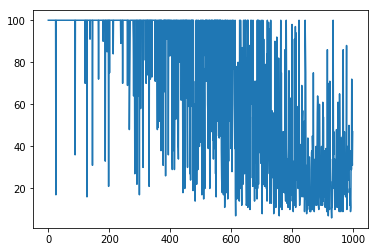

In [9]:
plt.plot(steps_list)

In [42]:
np.mean(steps_list)

35.159